## <font color=blue> Python Lab #08 </font>: Understanding Entropy


### Homework submission: School MOOC system
### <font color=red> Due date: Dec. 1 (Wednesday), 24:00 </font>
#### <font color=red> NOTE </font>: 
#1 ipynb file format should be <font color=red> LAB08_yourIDnumber.ipynb </font> ( ex:  LAB08_20185433224234.ipynb ).
#2 If you don't follow the instructions here, there is <font color=red>10 % penalty</font>.

#3 Any copied submission won't be graded. 
> 1) i.e., 0 point for every same copy. <br>
> 2) Also, slight modification of one version will be regarded as copy. </font>
>```python
>if copy found:
>    for all copies:
>        score = 0
>```    

----

#### (1) Generate message #1 with the following conditions. Caluculate probability and entropy of the message. Also, draw probability graph with bar plot.
#### Condition: 
__message #1__
* Containing 4 letters A, B, C, D
* Given probability set = [0.25, 0.25, 0.25, 0.25] for generating message.
* length = 10000
* Random letters
* __Calculate its entropy using counted probability__ of the generated message.

__Note__ : Since the message is generated randomly, its letter's probability can not be the same as given probability set <br>  e.g., P{A} = 0.25 can be P{A} = 0.249 or 0.251, and so on.

In [178]:
import random

def GenMsg(figure,msgLen, lastLetter):
    lastLetter = (lastLetter>figure)*figure+(lastLetter<=figure)*lastLetter
    outString = ''
    for i in range(msgLen):
        tmpString = chr(random.Random(i).randrange(65, 65 + lastLetter + 1))
        outString += tmpString
    return outString

msgLength = 10000
lastChr = 3 
outMsg = GenMsg(4, msgLength, lastChr)

msgDict = dict((i, outMsg.count(i)) for i in outMsg)
for key in sorted(msgDict.keys()):
    print(key, msgDict[key])
print()
sortDict = dict((key, msgDict[key]) for key in sorted(msgDict.keys()))

letterList = list(key for key in sortDict.keys())
occurList = list(value for value in sortDict.values())
print(letterList)
print(occurList)

A 2531
B 2491
C 2437
D 2541

['A', 'B', 'C', 'D']
[2531, 2491, 2437, 2541]


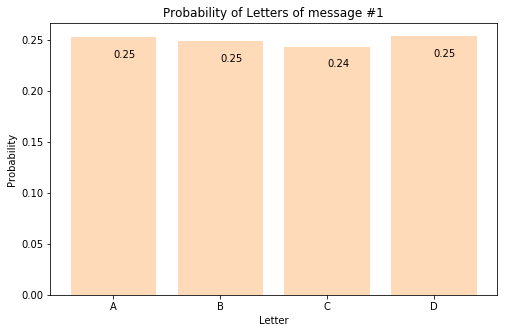

entropy = 2.00 bit/sample


In [179]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Occurrence to probability: 
probList = np.array(occurList, dtype='float')/sum(occurList)

fig = plt.figure(figsize = (8,5))
rng = range(len(probList))

plt.bar(rng, probList, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, letterList)
tmpString = 'Probability of Letters of message #1'
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probList[i]-.02, '{:.2f}'.format(probList[i]))

plt.show()

# entropy part
import math
probList = list(float(i)/sum(occurList) for i in occurList)
Hx = 0
for i in range(len(probList)):
    Hx += -probList[i]*math.log2(probList[i])
Hx = ("%.2f" % Hx)


print('entropy = '+Hx+' bit/sample')


# letterList and occurList

#### (2) Generate message #2 with the following conditions. Caluculate probability and entropy of the message. Also, draw probability graph with bar plot.
#### Condition: 
__message #2__
* Containing 4 letters A, B, C, D
* Given probability set = [1.0, 0.0, 0.0, 0.0] for generating message.
* length = 10000
* Random letters
* __Calculate its entropy using counted probability__ of the generated message.

In [180]:
import random

def CountMsg(msg):
    letterLst = ['A','B','C','D']
    countLst = [0,0,0,0]
    for i in range(len(msg)):
        if msg[i] =='A':
            countLst[0]+=1
        elif msg[i] =='B':
            countLst[1]+=1
        elif msg[i] =='C':
            countLst[2]+=1
        else:
            countLst[3]+=1
    return (letterLst, countLst)

def GenMsg(msgLen, lastLetter):
#     lastLetter = (lastLetter>26)*26+(lastLetter<=26)*lastLetter
    outString = ''
    for i in range(msgLen):
        tmpString = chr((random.random()<=1)*65+(random.random()>1)*66)
        outString += tmpString
    return outString

# Python script
msgLength = 10000
lastChr = 3     # min: 0, max:26 (# alphabets)
outMsg = GenMsg(msgLength, lastChr)

# Counting letters
lettLst, cntLst = CountMsg(outMsg)
print(lettLst)
print(cntLst)

['A', 'B', 'C', 'D']
[10000, 0, 0, 0]


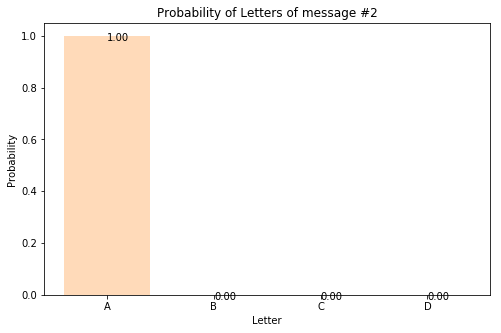

entropy = 0.00 bit/sample


In [181]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Occurrence to probability: 
probLst = np.array(cntLst, dtype='float')/sum(cntLst)

fig = plt.figure(figsize = (8,5))
rng = range(len(probLst))

plt.bar(rng, probLst, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, lettLst)
tmpString = 'Probability of Letters of message #2'
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probLst[i]-.02, '{:.2f}'.format(probLst[i]))

plt.show()

# entropy part
import math
probLst = list(float(i)/sum(cntLst) for i in cntLst)
Hx1 = 0
for i in range(len(probLst)):
    if probLst[i]>0:
        Hx1 += -probLst[i]*math.log2(probLst[i])
    
Hx1 = ("%.2f" % Hx1)


print('entropy = '+Hx1+' bit/sample')


# lettLst and cntLst

#### (3) Generate message #3 with the following conditions. Caluculate probability and entropy of the message. Also, draw probability graph with bar plot.
#### Condition: 
__message #3__
* Containing 4 letters A, B, C, D
* Given probability set = [0.75, 0.05, 0.10, 0.10] for generating message.
* length = 10000
* Random letters
* __Calculate its entropy using counted probability__ of the generated message.

In [182]:
import random

def GenMsg1(msgLen):
    letter = ['A','B','C','D']
    possibility = np.array([0.75,0.05,0.10,0.10])
    outString = ''
    for i in range(msgLen):
        outString += np.random.choice(letter,p=possibility.ravel())
    return outString
   

# Python script
msgLength = 10000
# lastChr = 3     # min: 0, max:26 (# alphabets)
outMsg = GenMsg1(msgLength)

# Counting letters
lettLst1, cntLst1 = CountMsg(outMsg)
print(lettLst1)
print(cntLst1)

['A', 'B', 'C', 'D']
[7478, 553, 1008, 961]


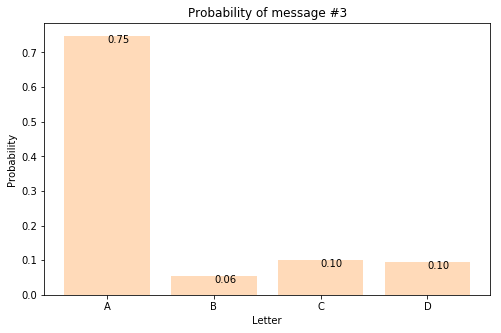

entropy = 1.20 bit/sample


In [183]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Occurrence to probability: 
probLst1 = np.array(cntLst1, dtype='float')/sum(cntLst1)

fig = plt.figure(figsize = (8,5))
rng = range(len(probLst1))

plt.bar(rng, probLst1, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, lettLst1)
tmpString = 'Probability of message #3'
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probLst1[i]-.02, '{:.2f}'.format(probLst1[i]))

plt.show()

# entropy part
import math
probLst1 = list(float(i)/sum(cntLst1) for i in cntLst1)
Hx2 = 0
for i in range(len(probLst1)):
    Hx2 += -probLst1[i]*math.log2(probLst1[i])
    
Hx2 = ("%.2f" % Hx2)


print('entropy = '+Hx2+' bit/sample')


# lettLst1 and cntLst1

#### (4) Generate message #4 with the following conditions. Caluculate probability and entropy of the message. Also, draw probability graph with bar plot.
#### Condition: 
__message #4__
* Containing 4 letters A, B, C, D
* Given probability set = [0.25, 0.25, 0.40, 0.10] for generating message.
* length = 10000
* Random letters
* __Calculate its entropy using counted probability__ of the generated message.

In [184]:
import random


def GenMsg1(msgLen):
    
    letter = ['A','B','C','D']
    possibility = np.array([0.25,0.25,0.40,0.10])
    outString = ''
    for i in range(msgLen):
        outString += np.random.choice(letter,p=possibility.ravel())
    return outString
   

# Python script
msgLength = 10000
# lastChr = 3     # min: 0, max:26 (# alphabets)
outMsg = GenMsg1(msgLength)

# Counting letters
lettLst2, cntLst2 = CountMsg(outMsg)
print(lettLst2)
print(cntLst2)

['A', 'B', 'C', 'D']
[2520, 2491, 3966, 1023]


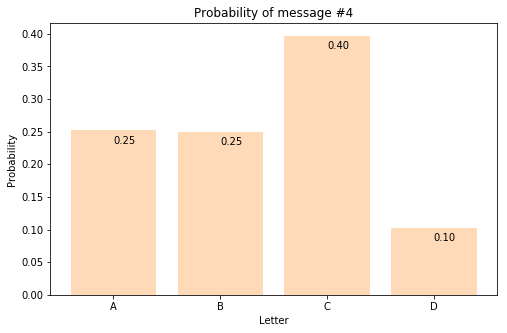

entropy = 1.87 bit/sample


In [185]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Occurrence to probability: 
probLst2 = np.array(cntLst2, dtype='float')/sum(cntLst2)

fig = plt.figure(figsize = (8,5))
rng = range(len(probLst2))

plt.bar(rng, probLst2, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, lettLst2)
tmpString = 'Probability of message #4'
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probLst2[i]-.02, '{:.2f}'.format(probLst2[i]))

plt.show()

# entropy part
import math
probLst2 = list(float(i)/sum(cntLst2) for i in cntLst2)
Hx3 = 0
for i in range(len(probLst2)):
    Hx3 += -probLst2[i]*math.log2(probLst2[i])
    
Hx3 = ("%.2f" % Hx3)


print('entropy = '+Hx3+' bit/sample')


# lettLst1 and cntLst1

#### (5) Draw probability graph of message #1 to #4 using 2x2 subplot and bar plot.

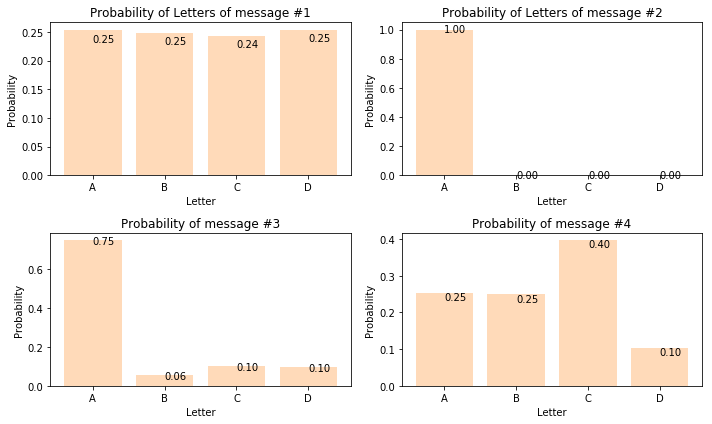

In [186]:

fig = plt.figure(figsize = (10,6))
plt.subplot(221)
probList = np.array(occurList, dtype='float')/sum(occurList)

rng = range(len(probList))

plt.bar(rng, probList, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, letterList)
tmpString = 'Probability of Letters of message #1'
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probList[i]-.02, '{:.2f}'.format(probList[i]))


plt.subplot(222)
probLst = np.array(cntLst, dtype='float')/sum(cntLst)

# fig = plt.figure(figsize = (8,5))
rng = range(len(probLst))

plt.bar(rng, probLst, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, lettLst)
tmpString = 'Probability of Letters of message #2'
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probLst[i]-.02, '{:.2f}'.format(probLst[i]))
    
plt.subplot(223)
probLst1 = np.array(cntLst1, dtype='float')/sum(cntLst1)

rng = range(len(probLst1))

plt.bar(rng, probLst1, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, lettLst1)
tmpString = 'Probability of message #3'
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probLst1[i]-.02, '{:.2f}'.format(probLst1[i]))

plt.subplot(224)
probLst2 = np.array(cntLst2, dtype='float')/sum(cntLst2)

rng = range(len(probLst2))

plt.bar(rng, probLst2, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, lettLst2)
tmpString = 'Probability of message #4'
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probLst2[i]-.02, '{:.2f}'.format(probLst2[i]))


fig.tight_layout()
plt.show()

#### (6) Draw entropy graph or message #1 to #4 using bar plot and ,<font color=red> discuss why</font> the entropy of each message changes
__NOTE__ : when you calculate entropy and don't forget to avoid $log_2( 0 )$ = - infinity

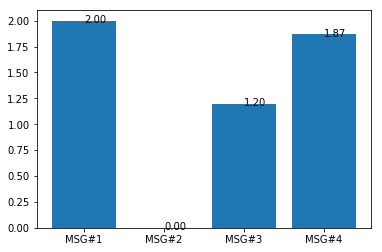

In [195]:
data = [float(Hx), float(Hx1), float(Hx2), float(Hx3)]
labels = ['MSG#1','MSG#2', 'MSG#3','MSG#4']
 
plt.bar(range(len(data)), data, tick_label=labels)
for i in range(len(data)):
    plt.text(i, data[i]-.02, '{:.2f}'.format(data[i]))
plt.show()

<h> <font color=red> **Observation:** value unstable↑,entropy↑.</font> </h>


#### (7) Show the probability of pixel value (i.e., 0 - 255) of lena image ('lena.jpg'). 

__Tip__: Still, we can use Counter() if we change a 2D image to 1D data. Check `numpy.ravel()`.
https://www.geeksforgeeks.org/numpy-ravel-python/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('./lena.jpg')
print(img.ravel())

plt.rc('font', family='STSong')
plt.hist(img.ravel(), bins=225)
plt.show()

<class 'numpy.ndarray'>
[161 162 163 ... 102 110 107]


<Figure size 640x480 with 1 Axes>

#### (8) Calculate the entropy and coding efficiency of lena image. <br> <font color=blue> How much can we compress the image more?</font> Is it good enough?
__NOTE__: 
* Coding efficiency: check lecture slides "07.CH7.Overview.Compression.Part01.pdf" pp.25.
* Let's assume that average code length of the image is 8 bits.

In [4]:
import math
from collections import Counter

arr = Counter(img.ravel())
keys = list(key for key in arr.keys())
values = list(value for value in arr.values())

probList = np.array(values, dtype='float')/sum(values)
probList = list(float(i)/sum(values) for i in values)
Hx = 0
for i in range(len(probList)):
    Hx += -probList[i]*math.log2(probList[i])
Hx = ("%.2f" % Hx)
efficiency = (float(Hx)/8)*100
print('entropy = '+Hx+' bit/symbol, Coding efficiency = '+("%.2f" %efficiency)+' %')
print()

entropy = 7.45 bit/symbol, Coding efficiency = 93.12 %



<font color=red>1.we can save about 1/4 because only half of the code length needs 8 bits. the average code length is actually less than 8 bits.
2. not good enough because there exist some code length of 3 or 4 bits.</font> <br>

#### (9) Make a difference image of lena. And show the probability of difference image using bar plot. 

__NOTE__:
* Definition of diff. pixel, $d[i,j] = x[i,j] - x[i,j-1]$, <br>
  where i: row, j: column, x: image.
* Apply the above operation to whole pixels __except the first column__ pixels of lena.


* Example of diff. pixels<br>
    org pixels  = [10, 11, 10, 13] <br>
    diff pixels = [10, 1 , -1,  3] 

In [23]:
import numpy as np
s = img.tolist()
a = np.zeros((512,512))
for i in range(len(s)):
    for j in range(len(s[i])):
        if j >0:
            if (s[i][j]-s[i][j-1])>0:
                a[i][j] = s[i][j]-s[i][j-1]
            else:
                a[i][j] = -(s[i][j-1]-s[i][j])
        else:
            a[i][j] = s[i][j] 
print(a)

[[161.   1.   1. ...  -3. -18. -24.]
 [162.   0.   0. ...  -1. -17. -25.]
 [163.   0.  -1. ...   0. -15. -27.]
 ...
 [ 44.   0.   4. ...   2.  -1.  -2.]
 [ 45.  -1.   7. ...   2.   5.  -3.]
 [ 43.   2.  12. ...   3.   8.  -3.]]
[[161 162 163 ... 170 152 128]
 [162 162 162 ... 171 154 129]
 [163 163 162 ... 170 155 128]
 ...
 [ 44  44  48 ... 102 101  99]
 [ 45  44  51 ... 103 108 105]
 [ 43  45  57 ... 102 110 107]]


C:\Users\Blanche\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


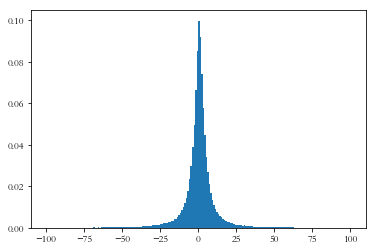

In [34]:
plt.rc('font', family='STSong')
plt.hist(a.ravel(), bins=200, normed=1,range=(-100,100))
plt.show()

#### (10) Calculate the entropy and coding efficiency of the difference image. And <font color=red>discuss why</font> the entropy and coding efficiency are different from problem (8).
__NOTE__: Let's assume that average code length of the image is 8 bits.

In [35]:
import math
from collections import Counter

arr = Counter(a.ravel())
keys = list(key for key in arr.keys())
values = list(value for value in arr.values())

probList = np.array(values, dtype='float')/sum(values)
probList = list(float(i)/sum(values) for i in values)
Hx = 0
for i in range(len(probList)):
    Hx += -probList[i]*math.log2(probList[i])
Hx = ("%.2f" % Hx)
efficiency = (float(Hx)/8)*100
print('entropy = '+Hx+' bit/symbol, Coding efficiency = '+("%.2f" %efficiency)+' %')
print()

entropy = 5.02 bit/symbol, Coding efficiency = 62.75 %



<h> <font color=red> **Your answer: the data concentrate arount 0 and don't change a lot. Then entropy↓ leads to coding efficiency↓ .** </font> </h>
